In [1]:
import numpy as np 
import pandas as pd 

In [2]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [3]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [4]:
data = pd.read_csv("C:\\Users\\pidik\\Downloads\\Groceries.csv") 
data.head() 

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [5]:
data.columns 

Index(['Member_number', 'Date', 'itemDescription'], dtype='object')

In [6]:
data.itemDescription.unique() 

array(['tropical fruit', 'whole milk', 'pip fruit', 'other vegetables',
       'rolls/buns', 'pot plants', 'citrus fruit', 'beef', 'frankfurter',
       'chicken', 'butter', 'fruit/vegetable juice',
       'packaged fruit/vegetables', 'chocolate', 'specialty bar',
       'butter milk', 'bottled water', 'yogurt', 'sausage', 'brown bread',
       'hamburger meat', 'root vegetables', 'pork', 'pastry',
       'canned beer', 'berries', 'coffee', 'misc. beverages', 'ham',
       'turkey', 'curd cheese', 'red/blush wine',
       'frozen potato products', 'flour', 'sugar', 'frozen meals',
       'herbs', 'soda', 'detergent', 'grapes', 'processed cheese', 'fish',
       'sparkling wine', 'newspapers', 'curd', 'pasta', 'popcorn',
       'finished products', 'beverages', 'bottled beer', 'dessert',
       'dog food', 'specialty chocolate', 'condensed milk', 'cleaner',
       'white wine', 'meat', 'ice cream', 'hard cheese', 'cream cheese ',
       'liquor', 'pickled vegetables', 'liquor (appetizer

In [7]:
data = pd.read_csv("C:\\Users\\pidik\\Downloads\\Groceries.csv")
newdata = data.dropna()  #dropna - does not change orginal value, returns new data frame
print(newdata)

       Member_number        Date        itemDescription
0               1808  21-07-2015         tropical fruit
1               2552  05-01-2015             whole milk
2               2300  19-09-2015              pip fruit
3               1187  12-12-2015       other vegetables
4               3037  01-02-2015             whole milk
...              ...         ...                    ...
38760           4471  08-10-2014          sliced cheese
38761           2022  23-02-2014                  candy
38762           1097  16-04-2014               cake bar
38763           1510  03-12-2014  fruit/vegetable juice
38764           1521  26-12-2014               cat food

[38765 rows x 3 columns]


In [8]:
transactions = data.groupby('Member_number')['itemDescription'].apply(list).values.tolist()

In [9]:
print(data.isnull().sum())

Member_number      0
Date               0
itemDescription    0
dtype: int64


In [10]:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

In [11]:
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)

In [12]:
print("Frequent Itemsets:")
print(frequent_itemsets)

Frequent Itemsets:
       support                                           itemsets
0     0.015393                            (Instant food products)
1     0.078502                                         (UHT-milk)
2     0.031042                                    (baking powder)
3     0.119548                                             (beef)
4     0.079785                                          (berries)
...        ...                                                ...
3011  0.011031     (yogurt, soda, whole milk, whipped/sour cream)
3012  0.010518  (whole milk, bottled water, rolls/buns, yogurt...
3013  0.013597  (whole milk, rolls/buns, yogurt, sausage, othe...
3014  0.010005  (shopping bags, whole milk, rolls/buns, yogurt...
3015  0.013597  (soda, whole milk, rolls/buns, yogurt, other v...

[3016 rows x 2 columns]


In [13]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

In [14]:
print("Association Rules:")
print(rules)

Association Rules:
                                            antecedents         consequents  \
0                                            (UHT-milk)        (whole milk)   
1                                                (beef)        (whole milk)   
2                                        (bottled beer)        (whole milk)   
3                                       (bottled water)        (whole milk)   
4                                         (brown bread)        (whole milk)   
...                                                 ...                 ...   
1112    (shopping bags, rolls/buns, yogurt, whole milk)  (other vegetables)   
1113  (other vegetables, shopping bags, yogurt, whol...        (rolls/buns)   
1114  (other vegetables, shopping bags, rolls/buns, ...        (whole milk)   
1115             (yogurt, soda, rolls/buns, whole milk)  (other vegetables)   
1116       (other vegetables, yogurt, soda, rolls/buns)        (whole milk)   

      antecedent support  conseq

In [15]:
pip install matplotlib 

Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [17]:
#plotting
import matplotlib.pyplot as plt
import seaborn as sns

Frequent Itemsets : 


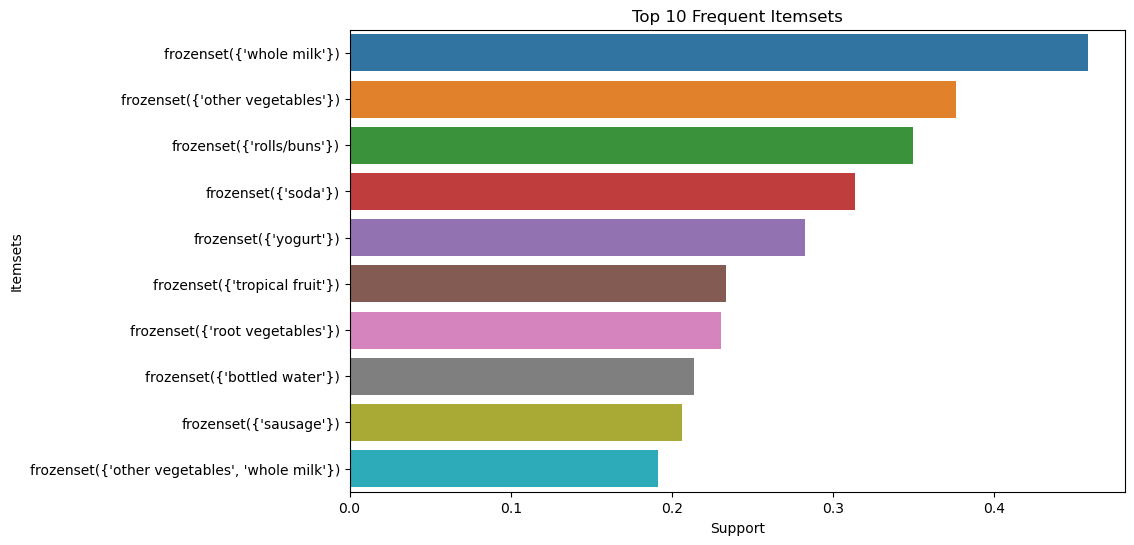

In [18]:
print("Frequent Itemsets : ")
plt.figure(figsize=(10, 6))
sns.barplot(x='support', y='itemsets', data=frequent_itemsets.sort_values(by='support', ascending=False).head(10))
plt.title('Top 10 Frequent Itemsets')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.show()

Association Rules : 


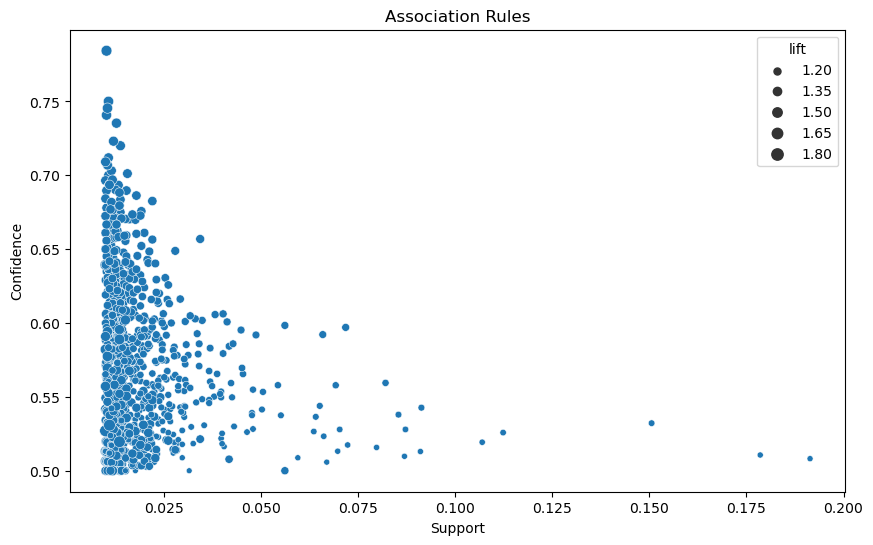

In [19]:
print("Association Rules : ")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='support', y='confidence', size='lift', data=rules)
plt.title('Association Rules')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()